In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#loading the data set to a data frame
wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [ ]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

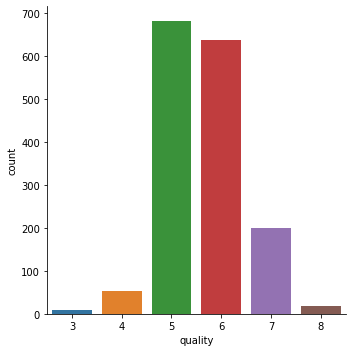

In [ ]:
#number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

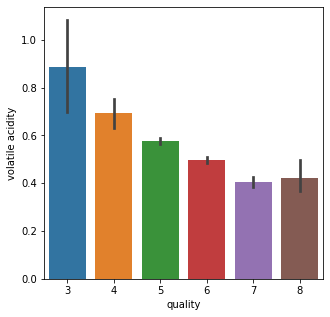

In [ ]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

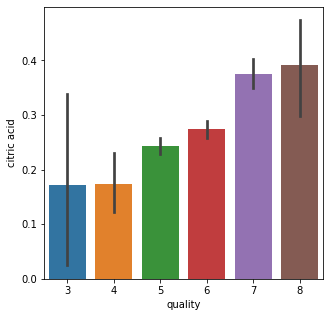

In [ ]:
# citric acid  vs quality
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='citric acid', data=wine_dataset)

#Correlation

In [ ]:
correlation = wine_dataset.corr()

<Axes: >

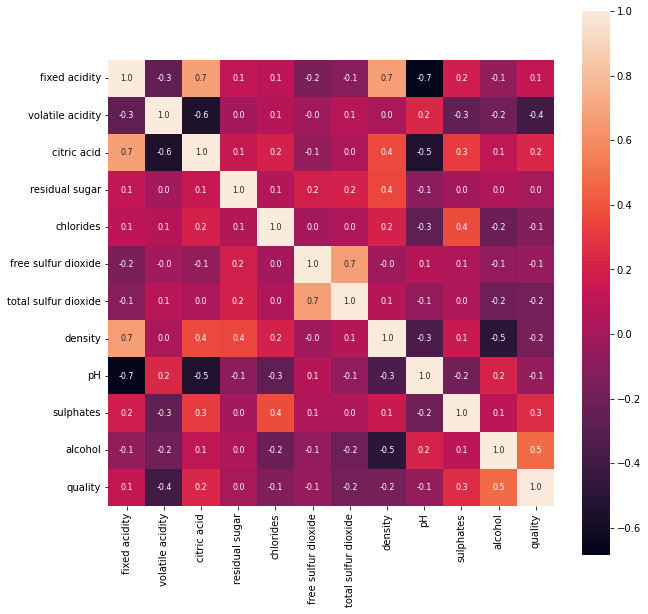

In [ ]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8})

Data Preprocessing

In [ ]:
#separating data and labels
X = wine_dataset.drop(columns =['quality' ], axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Laben Binarization

6 or less than 6 ----- bad

7 or greater than 7 ----- good

In [ ]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, stratify=Y, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1039, 11) (560, 11)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1039,) (560,)


Training my model

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9160714285714285


In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy : ", train_data_accuracy)

Accuracy :  1.0


Building a Predictive System

In [ ]:
input_data = (8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.3,0.75,10.5)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the np array as we are predicting for one instace
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("Bad Quality")
else:
  print("Good Quality")


[1]
Good Quality


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
